<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 17 Interpolation

##7.1 Interpolation Problem Statement

Interpolation is the process of finding an estimation function of data y^(x) such that for all x(i), y^(xi) = yi. Therefore when we recieve a nuew datapoint x*, it is possible to interpolate the function value using our esimation.

The key difference between interpolation and other ways of predicting data (such as linear regression) is that interpolation is used to esimate data points within the range of existing data. For example in the following image, the predicted y value within the domain of the function

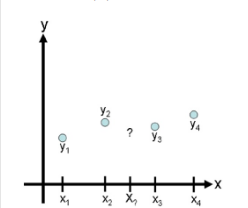

There are various types of interpolation, such as linear, cubic spline, lagrange polynomial, and newton polynomial interpolation

##7.2 Linear Interpolation

Linear interpolation is a method of estiating the value of a function for an unknown datapoint assuming that the data follows a mostly linear pattern and that the x points are in increasing order. For every xi in the domain of f, if x_new exists in the inequality:

xi < x_new < xi+1

The linear interpolation can be applied:

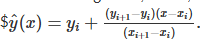

Interpolated value at x = 1.5: y = 3.0


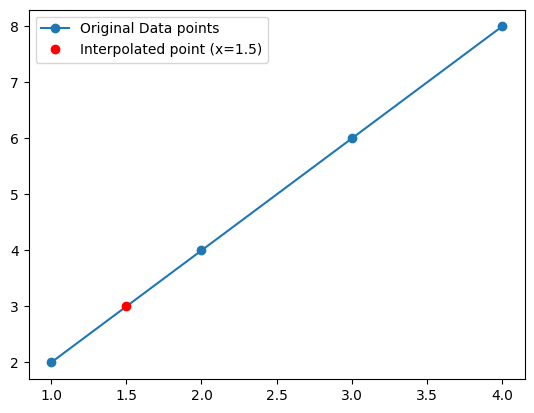

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4])
y = np.array([2,4,6,8])

def linear_interpolation(x, y, x_new):
    for i in range(len(x) - 1):
      #if x is sandwiched between two datapoints
        if x[i] <= x_new <= x[i + 1]:
            x1, y1 = x[i], y[i]
            x2, y2 = x[i + 1], y[i + 1]
            #linear interpolation equation
            return y1 + (y2 - y1) * (x_new - x1) / (x2 - x1)
    return None

x_new = 1.5
y_new = linear_interpolation(x,y,x_new)
print(f"Interpolated value at x = {x_new}: y = {y_new}")

#plotting figure
plt.plot(x, y, 'o-', label="Original Data points")
plt.plot(x_new, y_new, 'ro', label=f"Interpolated point (x={x_new})")
plt.legend()
plt.show()

##17.3 Cubic Spline Interopolation

Cubic interpolation is a method of estiating the value of a function for an unknown datapoint assuming that the data follows a cubic polynomial (in the form of Si(x)=aix3+bix2+cix+di). Therefore to find the interpolation, we must find all four coefficients for the cubic function. Therefore if there are n points on the graph, there are 4(n-1) functions that need to be calculated

xi < x_new < xi+1

Therefore to find all of the coefficients we see:

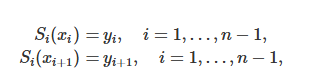

to find the constants ci and di

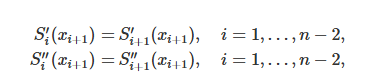

to find the constants ai, bi, and ci

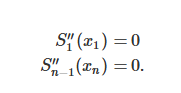

to resolve any remaining unknowns


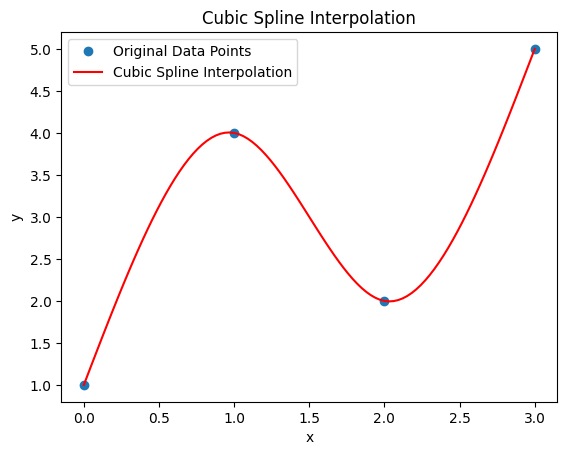

In [25]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3]
y = [1, 4, 2, 5]

# using library cubicspline function
f = CubicSpline(x, y, bc_type='natural')
#creating s blank array of 3 points to fill in data
x_new = np.linspace(0, 3, 100)
#finding corresponding y data
y_new = f(x_new)


#plotting figure
plt.plot(x, y, 'o', label="Original Data Points")
plt.plot(x_new, y_new, 'r-', label="Cubic Spline Interpolation")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()